## **Final Project**

### **Group 3**

#### **Are Electric Cars Truly Green? Let’s Settle the Debate with Data Science!**

**Does The introduction of electric cars actually help reduce carbon emission?**

Electric cars are the rage these days. They’re sleek, modern, and, let’s admit it, kinda cool. Even better, they come with the promise of saving the environment—double win, right?

But wait! There’s a plot twist. While EVs shine in reducing tailpipe emissions, critics argue that their "eco-friendliness" might just be a well-marketed illusion. The skeptics say, “Sure, no fumes on the road, but have you seen the carbon cost of making those batteries and components? It’s a monster compared to combustion engines!”

So, who’s right? Are EVs truly the knights in shining armor for our planet, or is their green badge a little tarnished?

We’re rolling up our sleeves and diving into the data to uncover the truth. Using the power of data science, we’ll cut through the noise, and come to a conclusion—at least for ourselves.

Why argue when the data can do the talking?



### Libraries

To start of with our science, we need the help of few libraries. Lets import them below

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### **Consideration and Preparation of Data**

When considering the dataset to use for the analysis, we need one that shows the emission from transport and another that considers the emission from manufacturing car components (Mainly batteries)

First we have the **Carbon emission data by sector** dataset (Source: [Our World Data](https://ourworldindata.org/emissions-by-sector) )

In [2]:
df_carbon_sector = pd.read_csv("../Datasets/co-emissions-by-sector.csv")
df_carbon_sector.head()

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,NaN,320000.0,20000.0
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,NaN,300000.0,20000.0
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,NaN,200000.0,20000.0
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,NaN,200000.0,20000.0
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,NaN,190000.0,20000.0


Considering the whole world would not yield a good result as there is widely varying adoption rate of EV's between countries. Since China holds one of the largest market share with regards to EV manufacturing, we are doing our analysis with the data for China

So lets filter the dataset to contain only the necessary data.
 - Country - China
 - From years 1995 - 2023  (Since we only have data from 1995 for the other datasets we plan to use)

The data is in CO2 emission in tonnes

In [3]:
df_necessary = df_carbon_sector[df_carbon_sector["Entity"] == "China"].iloc[5: , [0, 2,7]]  # Filtering for china and start year (1995)
df_necessary.rename(columns={"Carbon dioxide emissions from transport": "emission_from_transport-t"}, inplace=True)  # Renaming the column
df_necessary.head(10)

,Entity,Year,emission_from_transport-t
1189,China,1995,127370000.0
1190,China,1996,169850000.0
1191,China,1997,146130000.0
1192,China,1998,140290000.0
1193,China,1999,157360000.0
1194,China,2000,248480000.0
1195,China,2001,254250000.0
1196,China,2002,276440000.0
1197,China,2003,313140000.0
1198,China,2004,371140000.0


Adding 2022 and 2023 values for emission by transport according to source : (https://www.statista.com/statistics/1200787/carbon-dioxide-emissions-transport-sector-worldwide-by-country/)

In [4]:
df_necessary.reset_index(inplace=True)
df_necessary.set_index('Year', inplace=True)
df_necessary.drop(columns=['index'], inplace=True)
df_necessary.loc[2022] = ['China', 929450000.00]
df_necessary.loc[2023] = ['China', 1078900000.00]

**Now Lets plot and see the trend for the emission in the transport sector in China**

<Axes: xlabel='Year'>

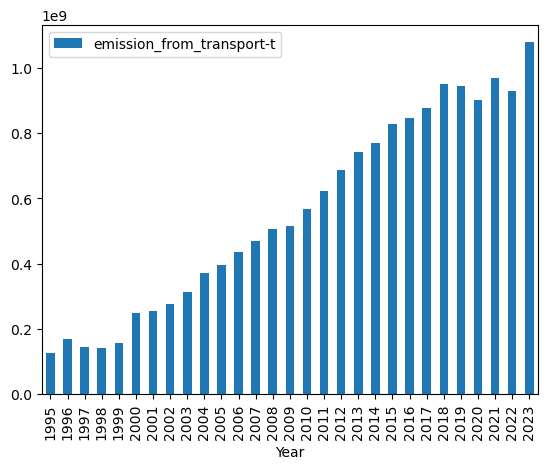

In [5]:
df_necessary = df_necessary.reset_index()
df_necessary.plot(kind='bar', x='Year', y='emission_from_transport-t')

From the bar graph we see that the emission from transport is increasing by year. Of course this is the case since the the population and the number of cars manufactured would also be increasing and so emission would also be having the same effect. So to make up for the increase , we use the automobile production dataset, which shows the automobile production in china each year (Source: https://www.ceicdata.com/en/indicator/china/motor-vehicle-production )

The production data is in Units

In [6]:
df_aut_prod = pd.read_csv("../Datasets/automobile_production.csv", usecols=['Year', 'Total'])
df_aut_prod.head()

,Year,Total
0,1995,"19,50,000"
1,1996,"19,70,000"
2,1997,"19,90,000"
3,1998,"20,00,000"
4,1999,"22,50,000"


**Lets check the data types for the column and convert it accordingly for manipulation and calculation purpose**

In [7]:
df_aut_prod.dtypes

Year      int64
Total    object
dtype: object

Converting to required data types

In [8]:
df_aut_prod['Total'] = df_aut_prod['Total'].str.replace(',', '').astype(float)
df_aut_prod['Year'] = df_aut_prod['Year'].astype(int)

**Lets plot and see the trend for automobile production in China**

<Axes: xlabel='Year', ylabel='Automobile Production Volume (Units)'>

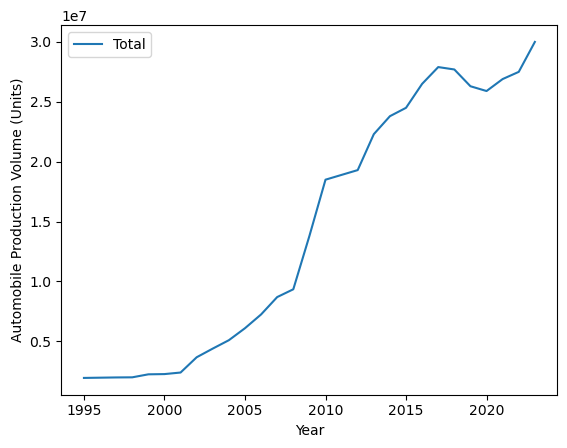

In [9]:
df_aut_prod.plot(kind='line', x='Year', y='Total', ylabel='Automobile Production Volume (Units)')

**Oh Woww! Now thats also an increasing trend**. Now that we have the automobile production dataset, we can put that into our emission data and get a better understanding of how the emission has changed over the years relative to the number of cars produced

This helps balance our data to make it more suitable for modeling to serve our purpose.

- We can first add the Automobile production column into the emission dataset
- Find the emission relative to the automobile production for that year
    - We do this by dividing the emission for the year relative to a base emission (mean) by the production for that year relative to a base production (mean)
    - `(emission / base emission) / (production / base production)`

In [10]:
# Function to normalise a column in a dataframe, given a dataframe and the column name
def normalise_data(dataframe, column_name):
    data_min = dataframe[column_name].min()
    data_max = dataframe[column_name].max()

    return (dataframe[column_name] - data_min) / (data_max - data_min)

In [11]:
df_necessary['Automobile_production-Units'] = df_aut_prod['Total']  # Adding the production data column to the first data frame created (df_necessary)

base_emission = float(df_necessary["emission_from_transport-t"].mean())
base_production = int(df_necessary["Automobile_production-Units"].mean())

df_necessary['normalised_emission'] = (((df_necessary["emission_from_transport-t"]) / base_emission) / (df_necessary["Automobile_production-Units"] / base_production)) * 100

# df_necessary['normalised_emission'] = normalise_data(df_necessary, 'normalised_emission') * 100
df_necessary.head()

,Year,Entity,emission_from_transport-t,Automobile_production-Units,normalised_emission
0,1995,China,127370000.0,1950000.0,168.561751
1,1996,China,169850000.0,1970000.0,222.497852
2,1997,China,146130000.0,1990000.0,189.501567
3,1998,China,140290000.0,2000000.0,181.018606
4,1999,China,157360000.0,2250000.0,180.483842


<Axes: xlabel='Year'>

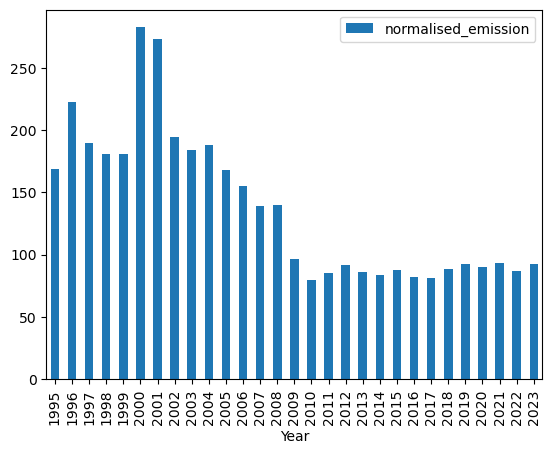

In [12]:
df_necessary = df_necessary.reset_index()
df_necessary.plot(kind='bar', x='Year', y='normalised_emission')

In [13]:
df_necessary['normalised_emission'] = normalise_data(df_necessary, 'normalised_emission') * 100  # Normalising

Now we can clearly see that the emission as a whole in the transport sector has in fact reduced compared to previous years

As we know the benefit in introducing electric Vehicles (EV) is in its minimal carbon emission when it is used on road. However, as discussed earlier the carbon emission from the process of manufacturing of battery and components of an electric car or transport is much higher when compared to that of conventional combustion engines.

So the second main dataset we use is one that that records the lithium production (main battery component) in each country. ( Source: [Our Word Data](https://ourworldindata.org/grapher/lithium-production?tab=chart) )

As we are considering China in this project, we filter the dataset accordingly as well.

**Note:** The data is in Kilo tonnes

In [14]:
df_lithium_production = pd.read_csv("../Datasets/lithium-production.csv")
df_lithium_production.head()

,Entity,Code,Year,Lithium production - kt
0,Africa,NaN,1995,520.0
1,Africa,NaN,1996,500.0
2,Africa,NaN,1997,700.0
3,Africa,NaN,1998,1000.0
4,Africa,NaN,1999,700.0


Producing lithium-ion batteries for electric vehicles is more material-intensive than producing traditional combustion engines.

Most lithium is extracted from hard rock mines or underground brine reservoirs, and much of the energy used to extract and process it comes from CO2-emitting fossil fuels.

**For every tonne of mined lithium, 15 tonnes of CO2 are emitted into the air** (Particularly in the most commonly used Hard rock mining) ( *According to a report by MIT’s Climate Lab* : [link](https://www.apmresearchlab.org/10x/lithium-mining-for-evs-sustainability#:~:text=Environmental%20impacts%20of%20lithium%20mining%20and%20batteries&text=According%20to%20a%20report%20by,high%20levels%20of%20CO2%20emissions.) )

In [15]:
df_lith_prod = df_lithium_production[df_lithium_production["Entity"] == "China"].iloc[ : , [0, 2,3]]  # Filtering for China and emission data column
df_lith_prod['emission_production-kt'] = df_lith_prod['Lithium production - kt'] * 15  # Multiplying by 15 for every tonne of Lithium. Not converting to tonnes  (From kilo tonnes) as we are anyway going to normalize it
df_lith_prod.head(5)

,Entity,Year,Lithium production - kt,emission_production-kt
174,China,1995,320.0,4800.0
175,China,1996,2800.0,42000.0
176,China,1997,2900.0,43500.0
177,China,1998,3000.0,45000.0
178,China,1999,2300.0,34500.0


In [16]:
df_lith_prod['emission_production_normalised'] = normalise_data(df_lith_prod, 'emission_production-kt') * 100  # Normalizing the data to account for similar weight age in the final data for emission

**Plotting the Lithium Production Data for China**

<Axes: xlabel='Year'>

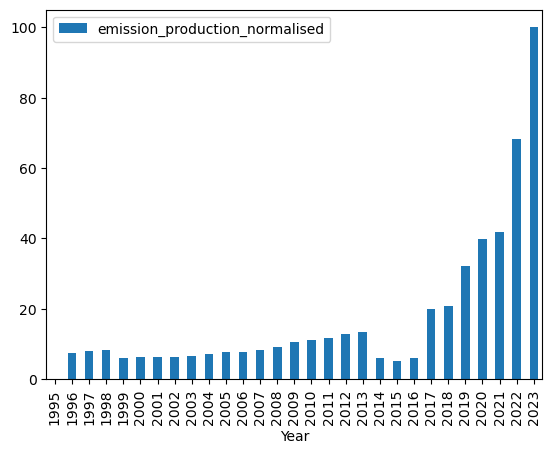

In [17]:
df_lith_prod = df_lith_prod.reset_index()
df_lith_prod.plot(kind='bar', x='Year', y='emission_production_normalised')

**Now finally lets add the lithium data to the original data of emission from transportation**

This gives us the Final emission data that accounts for both sides of effect of introducing EV's to the world

In [18]:

df_necessary['producion_emission'] = df_lith_prod['emission_production_normalised']  # Adding Lithium Data to the original Data frame
df_necessary['Final_data'] = df_necessary['producion_emission'] + df_necessary['normalised_emission']

#### **Plotting the Final Data**

<Axes: xlabel='Year'>

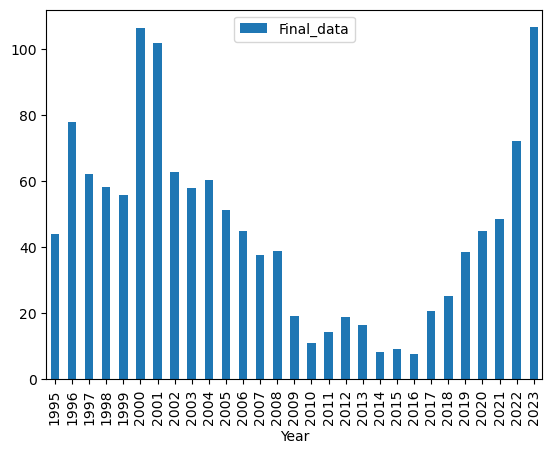

In [19]:
df_necessary = df_necessary.reset_index()
df_necessary.plot(kind='bar', x='Year', y='Final_data')

### **Lets Begin the Modeling**

Before modeling the data we need to first understand the distribution or structure of the data. We do this by plotting the histogram of the data

array([[<Axes: title={'center': 'Final_data'}>]], dtype=object)

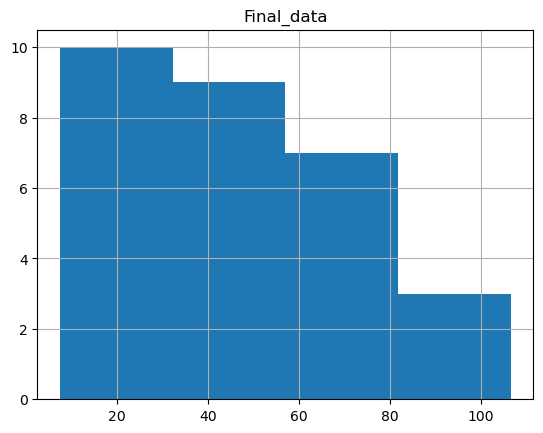

In [20]:
df_necessary.hist('Final_data', bins=4)

**Model Considerations:**

- We know that the data is strictly positive as it is emission data
- The data is continuous
- From the histogram it is right skewed

For the above reasons we chose to model our data Using Gamma Distribution

**Modeling Aproach**

Since our Goal is to understand the influence or effect from the introduction of EV's we can use two instance of each parameters. One before the introduction of Electric Vehicles and one after. 

We can then use this transition point or switch point ($\tau$) to understand more about our world

**We can assign a Uniform prior belief for $\tau$ to better understand when a change might have happened. (Discrete Uniform Distribution). By using a Discrete Uniform Distribution for our switch point, we prevent introducing any prior bias about when the change might happen and allow the data to speak for itself in determining the most likely change point**

**The Gamma Distribution** is determined by its parameters alpha and beta. So lets consider a value for alpha to determine the shape and one for beta to determine the rate of the model.

- Since our data is skewed we can consider a value of alpha greater than but closer to 1

- For beta we can consider a smaller value as the relative emission data considered may not vary to a large extend over the years

We use a Normal distribution to model the alpha and beta parameters

In [21]:
df_necessary['Final_data'].describe()

count     29.000000
mean      45.587537
std       28.905799
min        7.526671
25%       19.068202
50%       44.781273
75%       60.458936
max      106.629347
Name: Final_data, dtype: float64

**Modeling using PyMc**

In [22]:
import pymc as pm

with pm.Model() as emission_model:
    # The Gamma parameters priors distribution
    alpha_1 = pm.Normal('alpha1', mu=3, sigma=25)  # Before switch point
    alpha_2 = pm.Normal('alpha2', mu=3, sigma=25)  # After switch point

    beta_1 = pm.Normal('beta1', mu=0.05, sigma=0.2)  # Before switch point
    beta_2 = pm.Normal('beta2', mu=0.05, sigma=0.2)  # After switch point

    tau = pm.DiscreteUniform("tau", lower=df_necessary['Year'].min(), upper=df_necessary['Year'].max())

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [23]:
with emission_model:
    idx = np.arange(df_necessary['Year'].min(), df_necessary['Year'].max() + 1) # Index
    alpha = pm.math.switch(tau > idx, alpha_1, alpha_2)
    beta = pm.math.switch(tau > idx, beta_1, beta_2)

**Likelihood Function using the parameter priors**

In [24]:
with emission_model:
    emissions = pm.Gamma('emissions', alpha=alpha, beta=beta, observed=df_necessary['Final_data'])

**Sampling using NUTS**

In [25]:

with emission_model:
    trace = pm.sample(4000, tune=1000, cores = 1)

Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [alpha1, alpha2, beta1, beta2]
>Metropolis: [tau]


Output()

c:\Users\yohan\anaconda3\envs\Yohan_Data_science\Lib\site-packages\pytensor\scalar\basic.py:2937: RuntimeWarning: 
invalid value encountered in log
  return np.log(x)

Output()

Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 806 seconds.
There were 118 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


**Now that the sampling is done, lets get the posterior parameters samples**

In [26]:
alpha_1_samples = trace['posterior']['alpha1'].values  # Shape: (chains, samples)

alpha_2_samples = trace['posterior']['alpha2'].values  # Shape: (chains, samples)

beta_1_samples = trace['posterior']['beta1'].values  # Shape: (chains, samples)

beta_2_samples = trace['posterior']['beta2'].values  # Shape: (chains, samples)

tau_samples = trace['posterior']['tau'].values  # Shape: (chains, samples)


In [27]:
data_count = len(df_necessary['Final_data'])  # Getting the count of the data frame considered

**Lets get the summary and plots of the parameters from the simulation using the arviz library**

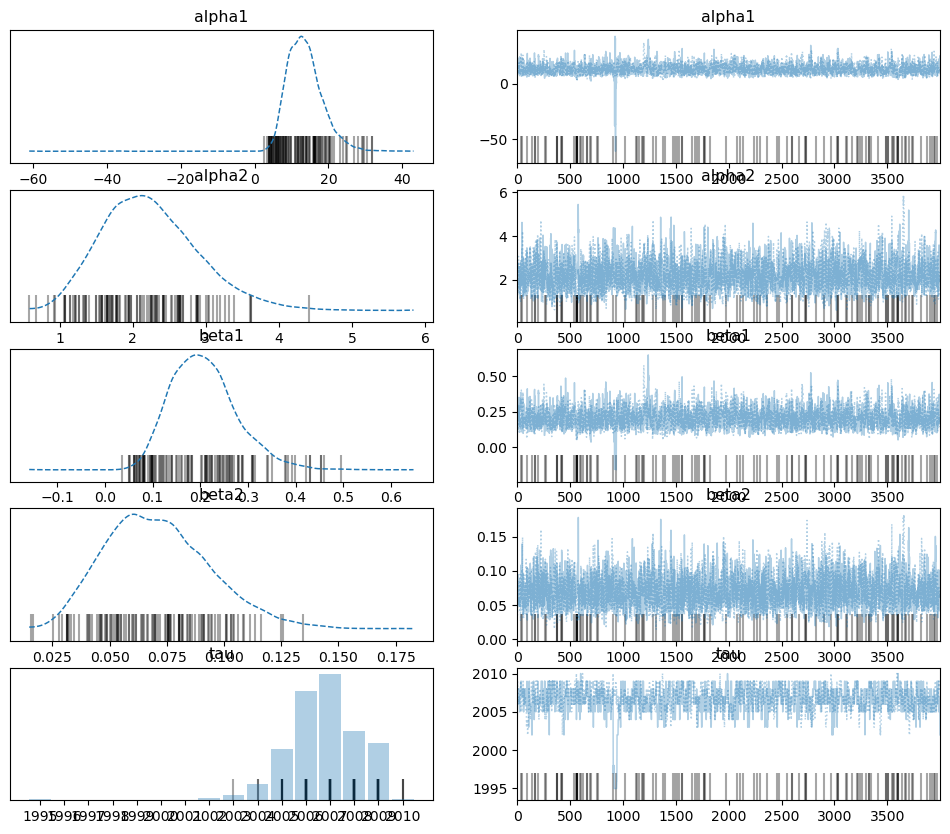

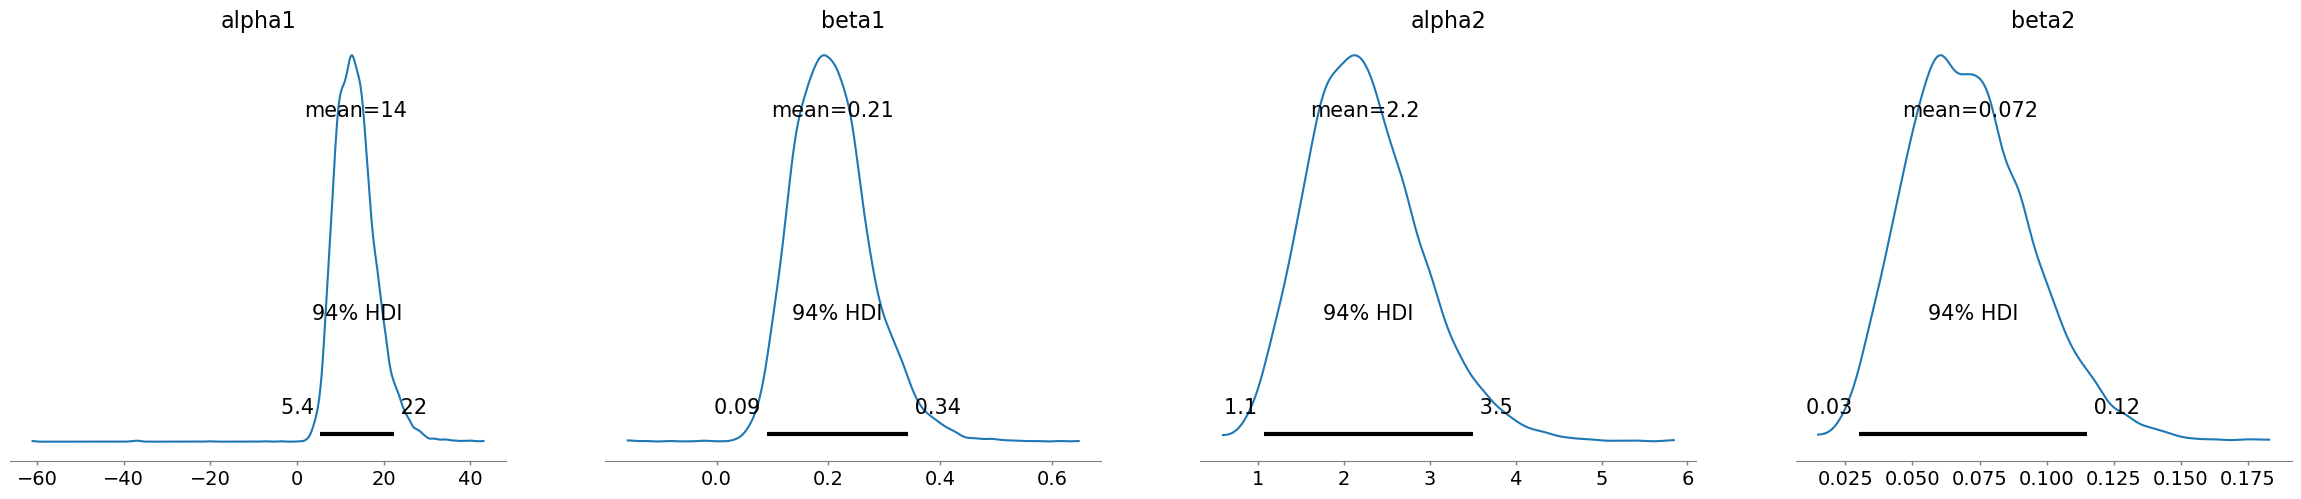

In [28]:
import arviz as az


az.plot_trace(trace, combined=True);
az.plot_posterior(trace, var_names=["alpha1", "beta1", "alpha2", "beta2"]);

**No that we have the parameter samples, lets plot the gamma model onto our actual data and see where the Switch point lies**

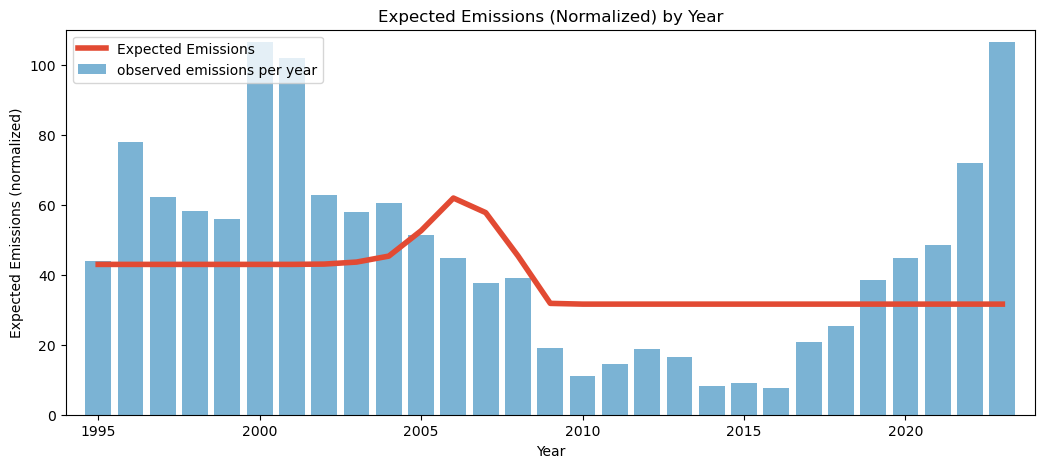

In [29]:
from scipy.stats import gamma

plt.figure(figsize=(12.5, 5))

N = tau_samples[1][1000: ].shape[0]  # tau_samples, alpha_samples, beta_samples contain N samples from the corresponding posterior distribution
expected_emission = np.zeros(data_count)

for i in range(data_count):
    year = (df_necessary.loc[i, 'Year'])
    ix = year < tau_samples[1][1000: ]  # ix is a bool index of all tau samples corresponding to the switchpoint occurring prior to value of 'year'

    alpha_param = (alpha_1_samples[1][1000: ][ix].sum()
                                   + alpha_2_samples[1][1000: ][~ix].sum()) / N
    beta_param = (beta_1_samples[1][1000: ][ix].sum()
                                   + beta_2_samples[1][1000: ][~ix].sum()) / N

    mean_emission = df_necessary['Final_data'].mean()
    expected_emission[i] = gamma.pdf(mean_emission, a=alpha_param, scale=1/beta_param) * 3000

plt.plot(range(df_necessary['Year'].min(), df_necessary['Year'].max() + 1), expected_emission, lw=4, color="#E24A33",
         label="Expected Emissions")
plt.xlim(df_necessary['Year'].min() - 1, df_necessary['Year'].max() + 1)
plt.xlabel("Year")
plt.ylabel("Expected Emissions (normalized)")
plt.title("Expected Emissions (Normalized) by Year")
plt.ylim(0, 110)
plt.bar(np.arange(df_necessary['Year'].min(), df_necessary['Year'].max() + 1), df_necessary['Final_data'], color="#348ABD", alpha=0.65,
        label="observed emissions per year")

plt.legend(loc="upper left");

**Looking at the plots, we see that there was an change in effect that took place 2005 - 2009. When we look at the actual facts, Starting in 2000, China began to emphasize reduced energy use and emissions in its auto industrial policy. This included implimenting hybrid systems and slow introduction of the EV vehicles.** 

This is mostly why the change and the slight decrease in emission is seen from the model

So the introduction of new energy fuel seems to be doing the trick.

### Comparing the two sides


**Now that we got the switch point Lets divide the data into two and create two distributions and compare their samples**

In [300]:
df_before_ev = df_necessary.loc[ :15 ,'Final_data']  # Data till 2010
df_after_ev = df_necessary.loc[ 15: ,'Final_data']  # # Data till 2010

Since both the before and after data seem to suite a normal distribution. Let use a Student - T Distribution to model these two parts of the data so that some outliers that may be present does not heavily impact the data

In [301]:
import pymc as pm

with pm.Model() as emission_model_2:
    μ_0 = pm.Normal('μ_0', 200, sigma=80)
    μ_1 = pm.Normal('μ_1', 150, sigma=80)
    
    σ_0 = pm.Uniform('σ_0', lower=0, upper=150)
    σ_1 = pm.Uniform('σ_1', lower=0, upper=150)
    
    ν2 = pm.Exponential('ν_minus_one', 1/(data_count - 1))
    
    no_ev = pm.StudentT('no_ev', nu=ν2, mu=μ_0, lam=σ_0**2, observed=df_before_ev.values)
    ev = pm.StudentT('ev', nu=ν2, mu=μ_1, lam=σ_1**2, observed=df_after_ev.values)
    
    diff_of_means = pm.Deterministic('difference of means', μ_1 - μ_0)
    effect_size = pm.Deterministic('effect size', diff_of_means / np.sqrt((σ_1**2 + σ_0**2) / 2))

In [302]:
with emission_model_2: 
    emission_trace = pm.fit(random_seed=20090425).sample(4000)

c:\Users\yohan\anaconda3\envs\Yohan_Data_science\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1027: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(


Output()

Finished [100%]: Average Loss = 567.48


**Now to plot the posterior samples created from the simulation to see the actual difference between the two data**

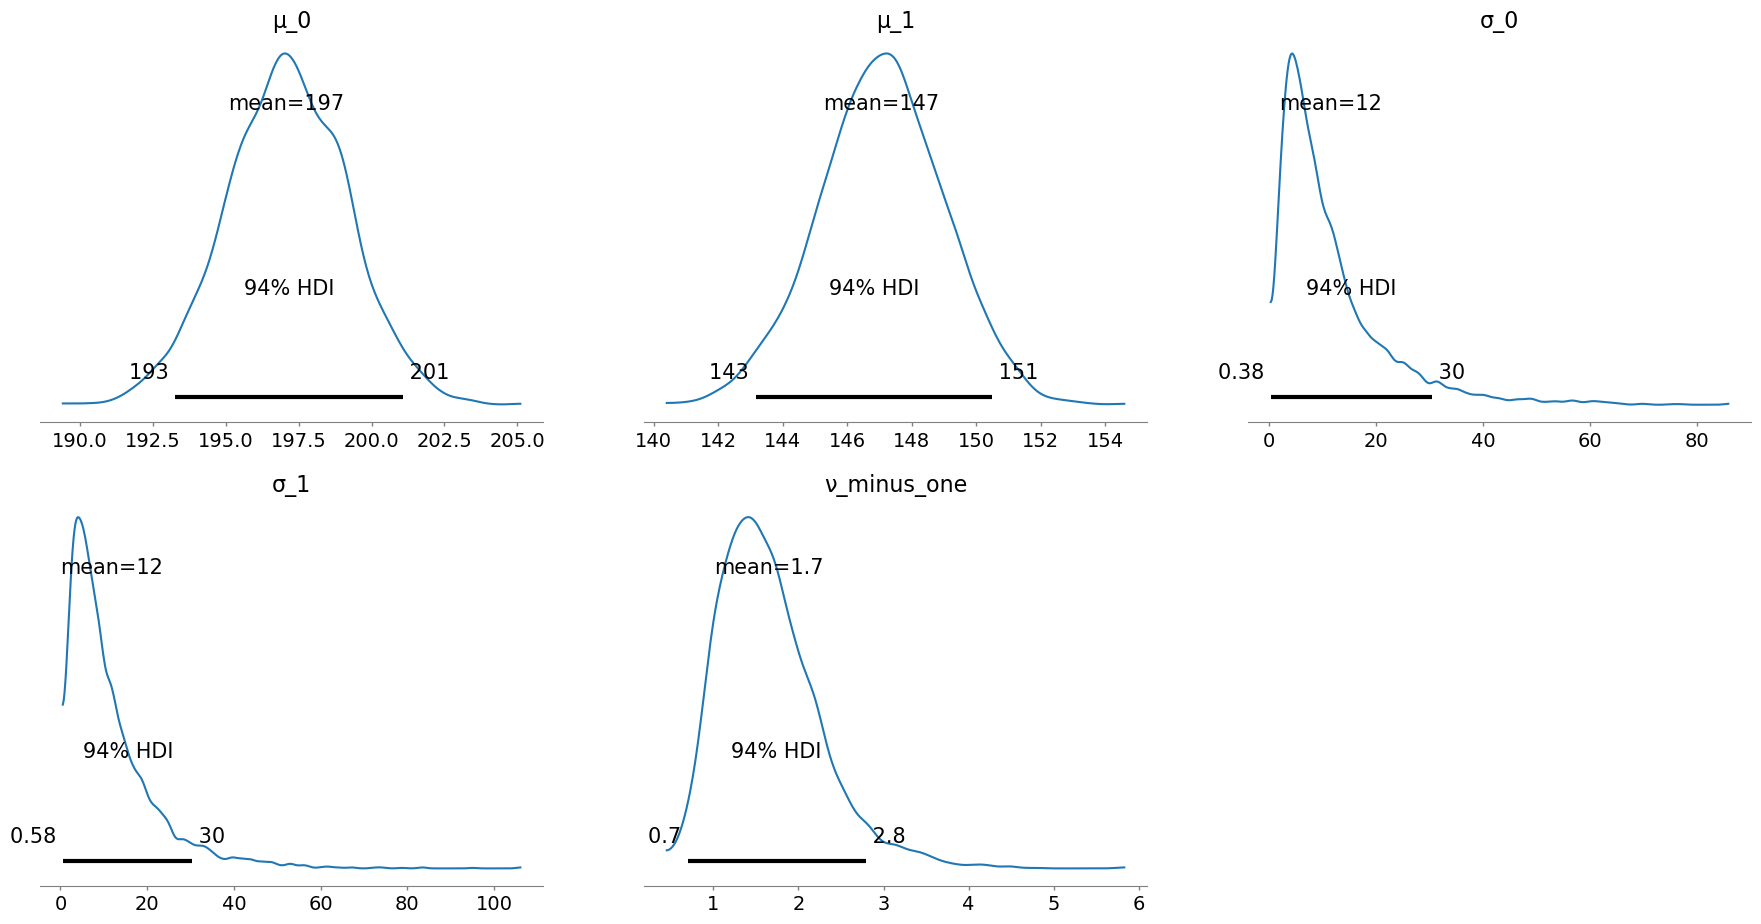

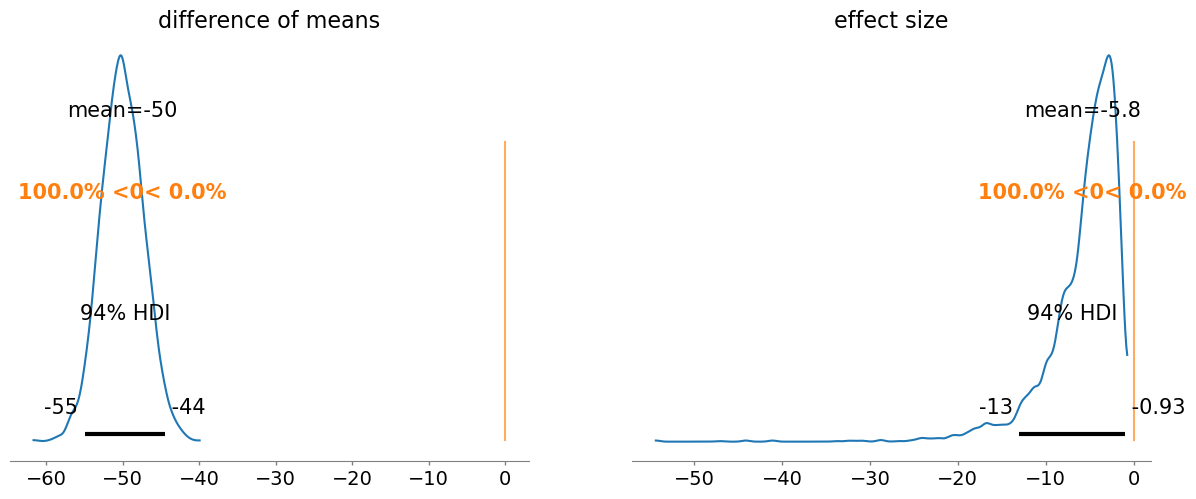

In [303]:
az.plot_posterior(emission_trace, var_names=['μ_0', 'μ_1', 'σ_0', 'σ_1', 'ν_minus_one']);
az.plot_posterior(emission_trace, var_names=['difference of means', 'effect size'], ref_val=0);

From the plots it can be infered that the mean of the data has shifted lower after the EV introduction, indicating a decrease in the emission value. 

The effect size of close to -6 with a 94% HDI is a significant indication that the data has changed after the introduction of EV.

### **What happens if this trend continues?**

From an Article by Harvard Kennedy School [link](https://www.belfercenter.org/publication/role-electric-vehicles-decarbonizing-chinas-transportation-sector) it was seen that China planned to introduce EV with a market penetration rate of 3% by 2020, 8% by 2025 and 20% by 2030.

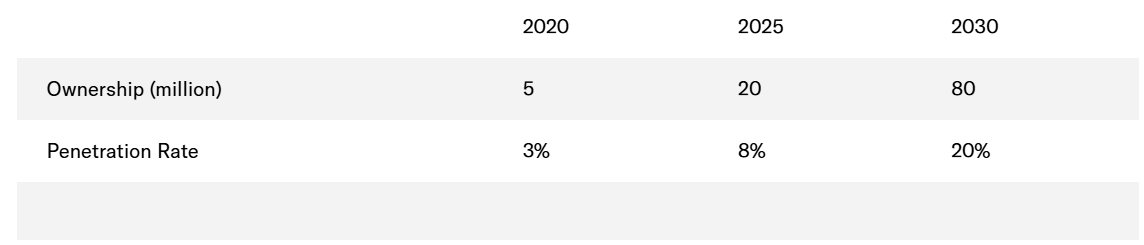

We calculated the future emissions in China from transport based on these rates. Assuming that by introducing EV on road, the carbon emission reduces correspondingly for future years. 

We used Linear interpolation for predicting the emission for future years ( `y = y1 + (y2 - y1) * (x - x1) / (x2 - x1))` )
- 2020 (Base Year): 944,370,000 tons (3% electric cars)
- 2025 Target: 8% electric cars
- 2030 Target: 20% electric cars
- 2035 Estimated Target: 40% electric cars
- As of 2020:
    - Total emissions: 944,370,000 tonns.  Electric cars: 3% of total cars
- 2025 emissions reduction = 944,370,000 * (1 - 0.92) = 75,549,600 tonns
- 2030 emissions reduction = 944,370,000 * (1 - 0.80) = 188,874,000 tonns

Getting the interpolated emission data from csv

In [304]:
predicted_transport_emission = pd.read_csv('../Datasets/carbon_emission_extended.csv')
predicted_transport_emission.tail()

,Year,emission_from_transport-t
7,2031,715696000
8,2032,675896000
9,2033,636096000
10,2034,596296000
11,2035,565422000


Now for the automobile production data and the lithium production data, we use Linear regression to predict for future years. 

So lets define a prediction function using Linear Regression and predict the values to then later normalise and get the final data for analysis. Similar to how we did before but now, with future years included

In [305]:
from sklearn.linear_model import LinearRegression
 
# Function to fit and predict using Linear Regression
def fit_and_predict(data, x_col, y_col, start_year, end_year):
    X = data[x_col].values.reshape(-1, 1)
    y = data[y_col].values
 
    model = LinearRegression()
    model.fit(X, y)
 
    future_years = np.arange(start_year, end_year + 1).reshape(-1, 1)
    predictions = model.predict(future_years)
 
    return pd.DataFrame({
        "Year": future_years.flatten(),
        f"{y_col}": predictions.astype(float)
    })

In [306]:
predicted_aut_production = fit_and_predict(df_aut_prod.iloc[15:, :], 'Year', 'Total', 2024, 2035)
predicted_production_emission = fit_and_predict(df_lith_prod.iloc[15:, :], 'Year', 'emission_production-kt', 2024, 2035)

aut_production_extend = pd.concat([df_aut_prod, predicted_aut_production], ignore_index=True)  # Combining previous and predicted
production_emission_extend = pd.concat([df_lith_prod, predicted_production_emission], ignore_index=True)  # Combining previous and predicted

transport_emission_extend = pd.concat([df_necessary[['Year', 'emission_from_transport-t']], predicted_transport_emission], ignore_index=True)
# transport_emission = pd.concat([df_aut_prod, predicted_aut_production], ignore_index=True)

**Normalise the data as done before**

In [307]:
transport_emission_extend['Automobile_production-Units'] = aut_production_extend['Total']

base_emission = float(transport_emission_extend["emission_from_transport-t"].max())
base_production = int(transport_emission_extend["Automobile_production-Units"].max())

transport_emission_extend['normalised_emission'] = (((transport_emission_extend["emission_from_transport-t"]) / base_emission) / (transport_emission_extend["Automobile_production-Units"] / base_production)) * 100

transport_emission_extend['normalised_emission'] = normalise_data(transport_emission_extend, 'normalised_emission') * 100
transport_emission_extend['normalised_emission'] = transport_emission_extend['normalised_emission']
transport_emission_extend.head()

,Year,emission_from_transport-t,Automobile_production-Units,normalised_emission
0,1995,127370000.0,1950000.0,53.586665
1,1996,169850000.0,1970000.0,75.561123
2,1997,146130000.0,1990000.0,62.117892
3,1998,140290000.0,2000000.0,58.661793
4,1999,157360000.0,2250000.0,58.443921


In [308]:
production_emission_extend['emission_production_normalised'] = normalise_data(production_emission_extend, 'emission_production-kt') * 100
transport_emission_extend['producion_emission'] = production_emission_extend['emission_production_normalised']
transport_emission_extend['Final_data'] = transport_emission_extend['producion_emission'] + transport_emission_extend['normalised_emission']  # Final Extended data

transport_emission_extend = transport_emission_extend.iloc[14: , :]  # Taking only data starting from 2009

**Now we are only considering the data from 2009 (data after the switch point seen before)**

So we have data from 2009 - 2035. Lets see how this introduction of EV and new energy fuel has worked in the long run

**Before modeling lets plot and see the final extended data**

<Axes: xlabel='Year'>

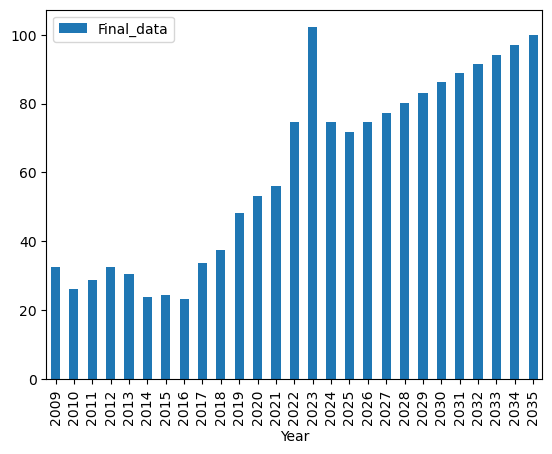

In [ ]:
transport_emission_extend = transport_emission_extend.reset_index()
transport_emission_extend.plot(kind='bar', x='Year', y='Final_data')

In [310]:
transport_emission_extend.describe()

,index,Year,emission_from_transport-t,Automobile_production-Units,normalised_emission,producion_emission,Final_data
count,27.000000,27.000000,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000
mean,27.000000,2022.000000,7.902176e+08,2.889672e+07,15.096455,45.888789,60.985244
std,7.937254,7.937254,1.499772e+08,6.765468e+06,7.612710,33.704423,27.900042
min,14.000000,2009.000000,5.170700e+08,1.380000e+07,0.000000,4.083560,23.264428
25%,20.500000,2015.500000,6.810130e+08,2.520000e+07,9.062167,10.403356,32.558916
50%,27.000000,2022.000000,7.980504e+08,2.790000e+07,18.451660,53.652286,71.811688
75%,33.500000,2028.500000,8.898900e+08,3.424044e+07,20.970393,76.826143,84.701444
max,40.000000,2035.000000,1.078900e+09,3.940044e+07,24.306304,100.000000,102.158393


Now that we have the extended data, lets find a switch point or change in effect similar to how we have done before.

This time using Normal Distribution to model the data

In [322]:
import pymc as pm

with pm.Model() as predict_model:
    mu_1 = pm.Normal('mu_1', mu=60, sigma=40)
    mu_2 = pm.Normal('mu_2', mu=60, sigma=40)

    sigma_1 = pm.Normal('sigma_1', mu=27, sigma=40)
    sigma_2 = pm.Normal('sigma_2', mu=27, sigma=40)

    tau = pm.DiscreteUniform("tau", lower=transport_emission_extend['Year'].min(), upper=transport_emission_extend['Year'].max())

In [323]:
with predict_model:
    idx = np.arange(transport_emission_extend['Year'].min(), transport_emission_extend['Year'].max() + 1) # Index
    mu = pm.math.switch(tau > idx, mu_1, mu_2)
    sd = pm.math.switch(tau > idx, sigma_1, sigma_2)

In [324]:
with predict_model:
    emissions = pm.Normal('emissions', mu=mu, sigma=sd, observed=transport_emission_extend['Final_data'])

In [325]:
with predict_model:
    trace = pm.sample(4000, tune=1000, cores = 1)

Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [mu_1, mu_2, sigma_1, sigma_2]
>Metropolis: [tau]


Output()

c:\Users\yohan\anaconda3\envs\Yohan_Data_science\Lib\site-packages\pytensor\scalar\basic.py:2937: RuntimeWarning: 
invalid value encountered in log
  return np.log(x)

Output()

Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 259 seconds.
There were 148 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [326]:
mu_1_samples = trace['posterior']['mu_1'].values  # Shape: (chains, samples)

mu_2_samples = trace['posterior']['mu_2'].values  # Shape: (chains, samples)

sigma_1_samples = trace['posterior']['sigma_1'].values  # Shape: (chains, samples)

sigma_2_samples = trace['posterior']['sigma_2'].values  # Shape: (chains, samples)

tau_samples = trace['posterior']['tau'].values  # Shape: (chains, samples)

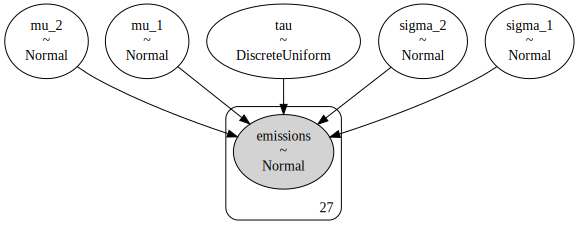

In [327]:
pm.model_to_graphviz(predict_model)

In [328]:
data_count = len(transport_emission_extend['Final_data'])

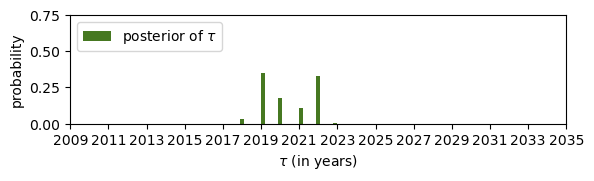

In [329]:
# Hostogram for tau samples (Switch Point)
plt.subplot(313)
w = 1.0 / tau_samples[1][1000: ].shape[0] * np.ones_like(tau_samples[1][1000: ])
plt.hist(tau_samples[1][1000: ], bins=data_count, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(transport_emission_extend['Year'].min(), transport_emission_extend['Year'].max() + 1))

plt.legend(loc="upper left")
plt.xticks(np.arange(transport_emission_extend['Year'].min(), transport_emission_extend['Year'].max() + 1, 2))
plt.ylim([0, .75])
plt.xlim([transport_emission_extend['Year'].min(), transport_emission_extend['Year'].max()])
plt.xlabel(r"$\tau$ (in years)")
plt.ylabel("probability");

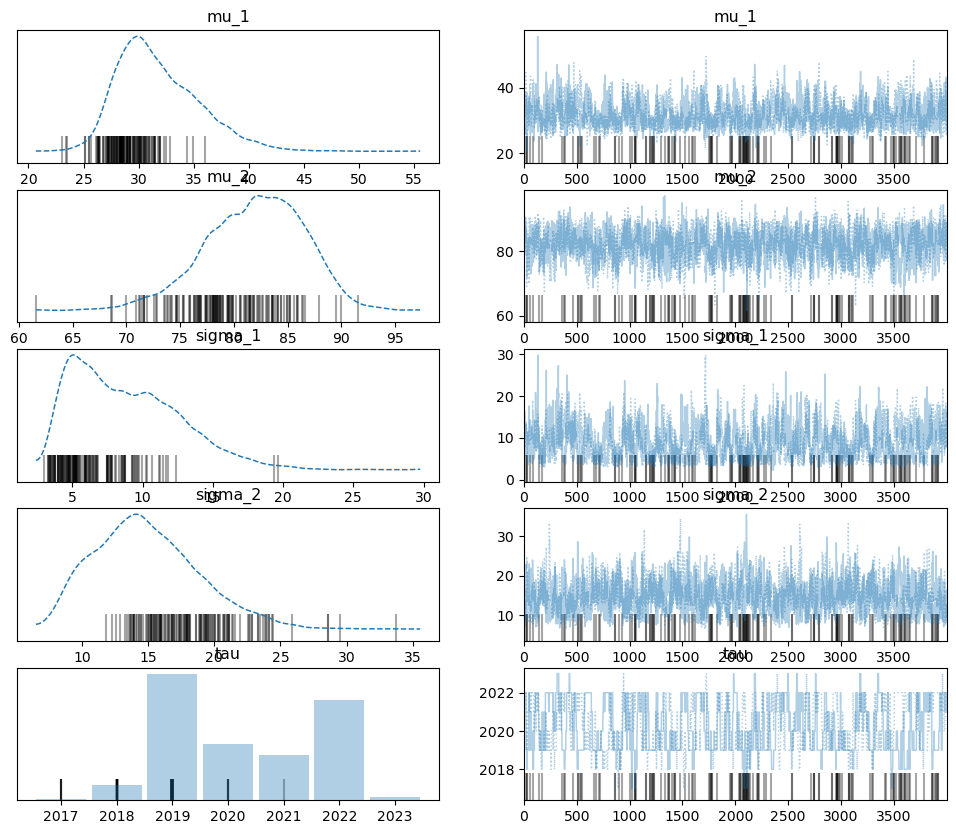

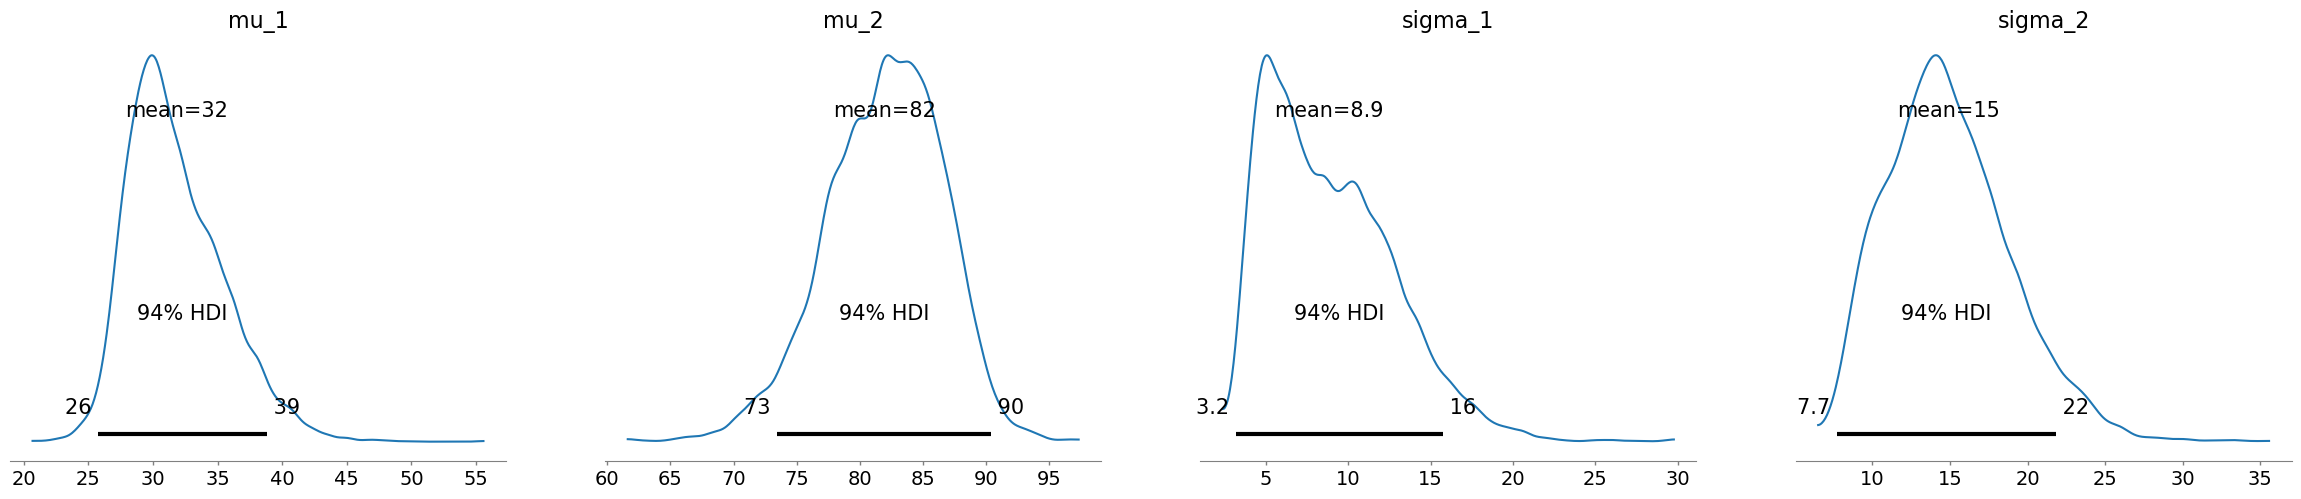

In [330]:
az.plot_trace(trace, combined=True);
az.plot_posterior(trace, var_names=["mu_1", "mu_2", "sigma_1", "sigma_2"]);

**Plotting the switch point along with the actual data**

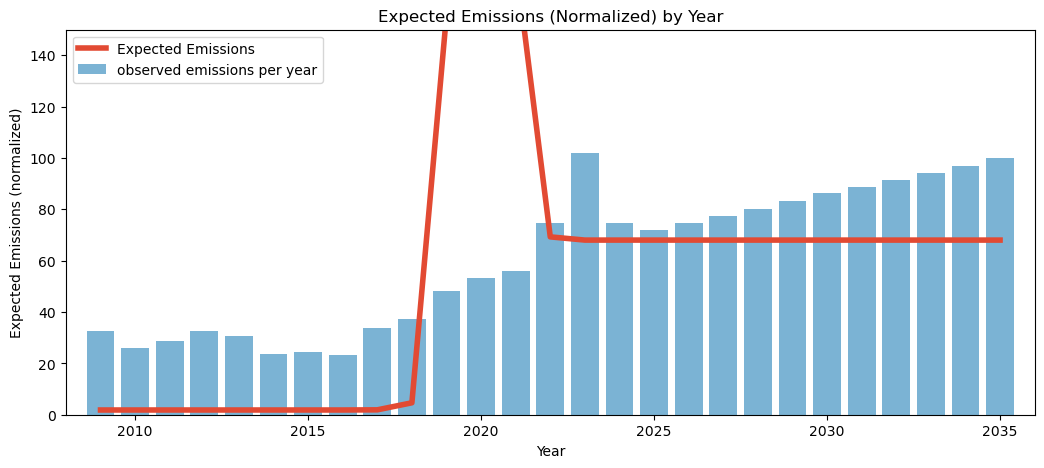

In [331]:
from scipy.stats import norm

plt.figure(figsize=(12.5, 5))
N = tau_samples[1][1000: ].shape[0]
expected_emission = np.zeros(data_count)
for i in range(data_count):
    year = (transport_emission_extend.loc[i, 'Year'])
    ix = year < tau_samples[1][1000: ]

    mu_param = (mu_1_samples[1][1000: ][ix].sum()
                                   + mu_2_samples[1][1000: ][~ix].sum()) / N
    sigma_param = (sigma_1_samples[1][1000: ][ix].sum()
                                   + sigma_2_samples[1][1000: ][~ix].sum()) / N
    
    mean_emission = transport_emission_extend['Final_data'].mean()
    expected_emission[i] = norm.pdf(mean_emission, mu_param, sigma_param) * 7000

plt.plot(range(transport_emission_extend['Year'].min(), transport_emission_extend['Year'].max() + 1), expected_emission, lw=4, color="#E24A33",
         label="Expected Emissions")
plt.xlim(transport_emission_extend['Year'].min() - 1, transport_emission_extend['Year'].max() + 1)
plt.xlabel("Year")
plt.ylabel("Expected Emissions (normalized)")
plt.title("Expected Emissions (Normalized) by Year")
plt.ylim(0, 150)
plt.bar(np.arange(transport_emission_extend['Year'].min(), transport_emission_extend['Year'].max() + 1), transport_emission_extend['Final_data'], color="#348ABD", alpha=0.65,
        label="observed emissions per year")

plt.legend(loc="upper left");

**There we have it. We see that the switch point is 2022** 

what happened here?

### **Conclusion**

In searching for why the reason could be, we found that **China's lithium consumption for lithium-ion batteries increased sharply after 2015**, driven by the national new energy policy and market demand. This explains the sleight increase in emission after the year 2016. 

Moreover, **Lithium demand in china exceeded supply in both 2021 and 2022, despite a 180% increase in production since 2017**. This means that there was a much higher rate of production of lithium batteries between the years 2020 and 2023, and **our model seems to catch that change and reflect the same**

The model also seems to suggest that **if we continue the production of batteries in the same rate with the same extraction methods, China will find it difficult to reduce its carbon emission even if they are doing so to introduce more EV's into the road**. So it is not so easy to blindly conclude that introducing EV is the way to the reduce emissions.

Sure it definitely helps in the same, However, we see that it is as important to keep other factors in mind to reduce the emission. New methods and practices for Lithium mining have been slowly introduced, but it is not yet nearly significant.

Researchers across the globe are trying to design new manufacturing processes or new battery chemistries that can work with more readily available, environmentally-friendly materials, but these technologies aren’t yet available on a wide scale.

“If we don't change how we make materials, how we make chemicals, how we manufacture, everything will essentially stay the same,” `Shao-Horn`

### **Possible Solutions**

- Use renewable energy: Use renewable energy sources for electricity
- Use direct lithium extraction: Use specialized filters to separate lithium from brine, which can reduce the footprint of traditional brine operations
- Recycle lithium batteries: Recycling lithium batteries can help reduce the demand for lithium. 

### **Thank You**